#<h1><center>FormulAE - 1</center></h1>
#<h1><center>The Racing Analysts!</center></h1>

###Importing all the modules required:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.stats import norm,chi2,t
from math import sqrt
import seaborn as sns

##In this project, we analyse two random variables from various Formula 1 races, namely


*   Average Pitstop time in a race for a particular driver in a race
*   Average Laptime in that particular race



##Now, let's take a look at our Raw data, the average Lap times and the average Pitstop times.

In [2]:
df1=pd.read_csv("filtered merged.csv")
df1

,Unnamed: 0,Race ID,Driver ID,position,avg laptime,Avg Pit Time
0,0,841,1,2.0,92975.103448,23213.000000
1,1,42,18,12.0,76989.958333,23252.750000
2,2,842,1,7.0,105531.946429,23252.750000
3,3,43,18,8.0,78758.357143,20659.333333
4,4,843,1,1.0,103896.892857,20659.333333
...,...,...,...,...,...,...
3921,4097,1052,854,16.0,101830.981818,25570.500000
3922,4099,1054,854,17.0,88732.046875,23572.666667
3923,4100,1055,854,18.0,87365.500000,23158.000000
3924,4101,1056,854,18.0,79684.253333,24797.000000


###Inspecting the basic parameters of our dataset using pandas:

In [3]:
df1.drop(columns=['Unnamed: 0','Race ID','Driver ID','position']).describe()

,avg laptime,Avg Pit Time
count,3926.000000,3926.000000
mean,99494.193197,24696.035885
std,19008.187893,4411.361896
min,62932.344828,16549.000000
25%,87230.852046,22085.500000
50%,99278.283019,23666.500000
75%,107601.534391,25953.000000
max,379323.607143,89258.000000


##Now, let's have a closer look at the mean and standard deviation of our data
###For the Pitstop times:

In [4]:
truemean=df1['Avg Pit Time'].mean()
truestd=df1['Avg Pit Time'].std()
print("The true Mean and Standard deviation of the Pitstop times of the drivers are {} seconds and {} seconds respectively".format(round(truemean/1000,2),round(truestd/1000,2)))

The true Mean and Standard deviation of the Pitstop times of the drivers are 24.7 seconds and 4.41 seconds respectively


##The histogram plot that can approximate the true distribution of the Pitstop time data is:

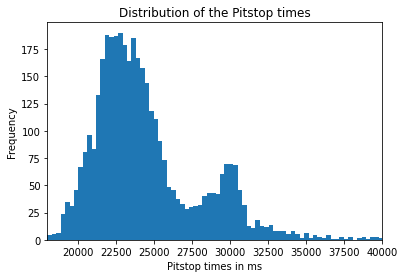

In [5]:
df1['Avg Pit Time'].plot.hist(bins=250)
plt.xlim(18000,40000);
plt.xlabel('Pitstop times in ms');
plt.title('Distribution of the Pitstop times');

###For the Lap times:

In [6]:
mean_lap=df1['avg laptime'].mean()
std_lap=df1['avg laptime'].std()
print("The true Mean and Standard deviation of the Lap times of the drivers are {} seconds and {} seconds respectively".format(round(mean_lap/1000,2),round(std_lap/1000,2)))

The true Mean and Standard deviation of the Lap times of the drivers are 99.49 seconds and 19.01 seconds respectively


##The histogram plot that can approximate the true distribution of the Lap time data is:

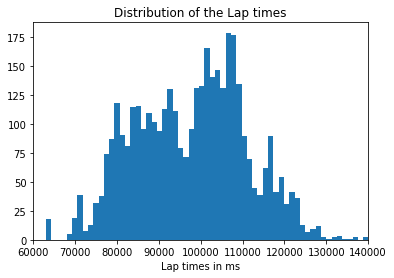

In [7]:
plt.hist(df1['avg laptime'],bins=250);
plt.xlim(60000,140000);
plt.xlabel('Lap times in ms');
plt.title('Distribution of the Lap times');

##The Scatter plot of the two random variables can be obtained as follows:

Text(0, 0.5, 'Average Pitstop times')

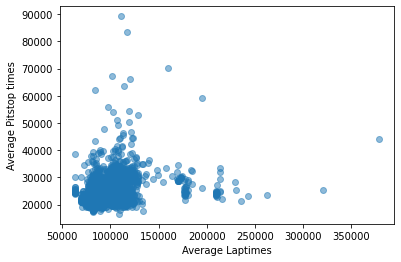

In [8]:
plt.scatter(y = df1['Avg Pit Time'],x = df1['avg laptime'],alpha=0.5);
plt.xlabel('Average Laptimes')
plt.ylabel('Average Pitstop times')

##Let's look at the Joint distribution of the lap times and the pitstop time data using the ```jointplot``` function from ```seaborn```

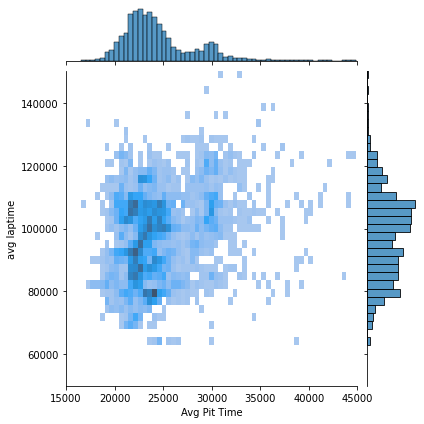

In [9]:
g = sns.jointplot(data=df1, x="Avg Pit Time", y="avg laptime", kind="hist",xlim=(15000,45000), ylim=(50000,150000));

In [10]:
data=pd.read_csv('filtered merged.csv')
data=data.dropna()

###Before generating the sampling distribution of the sample means and variances for our data, let us recall the true parameters.

Parameter | Pitstop Times  | Lap times
----------|-------------------|------------------
Mean      |24.7 seconds  | 99494 seconds
Variance |4.41 seconds      | 19008 seconds



##Generating the Sampling distribution of the sample means and variances for the data

###Generating the samples for Laptimes:

In [11]:
means=[]
variances=[]
stds=[]
for i in range(1000):
    sample=data['avg laptime'].sample(100,replace=True)
    means.append(sample.mean())
    variances.append(sample.var())
    stds.append(sample.std())
    

##Plot of the sampling distribution for laptimes

###Mean:

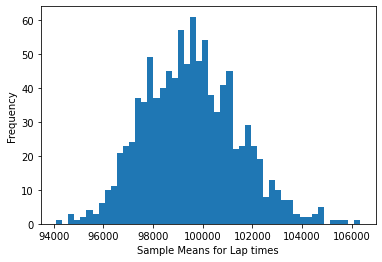

In [12]:
plt.hist(means,bins=50)
plt.xlabel('Sample Means for Lap times')
plt.ylabel('Frequency')
plt.show()

###Variance:

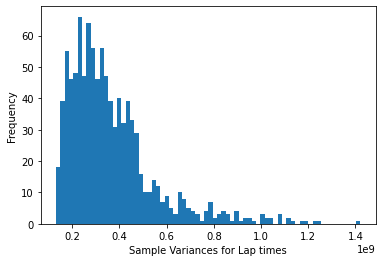

In [13]:
plt.hist(variances,bins=70)
plt.xlabel('Sample Variances for Lap times')
plt.ylabel('Frequency')
plt.show()

###Similarly,generating the samples for Pitstop times:

In [14]:
means_=[]
variances_=[]
stds_=[]
for i in range(1000):
    sample=data['Avg Pit Time'].sample(700,replace=True)
    means_.append(sample.mean())
    variances_.append(sample.var())
    stds_.append(sample.std())
    

##Plot of the sampling distribution for Pitstop times

###Mean:

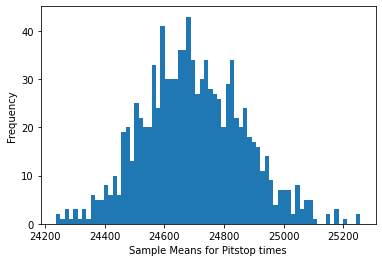

In [15]:
plt.hist(means_,bins=70)
plt.xlabel('Sample Means for Pitstop times')
plt.ylabel('Frequency')
plt.show()

###Variance:

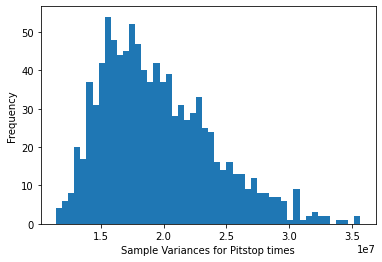

In [16]:
plt.hist(variances_,bins=50)
plt.xlabel('Sample Variances for Pitstop times')
plt.ylabel('Frequency')
plt.show()

###Now that we have plotted the sampling distribution for a specific number of samples, we can advance it further by exploring the sampling distributions when the sample sizes and number of samples can be varied

In [17]:
def f(Input,value,sample_size,bins):
    mean=[]
    variance=[]
    std=[]
    if Input=='Laptime':
        x='avg laptime'
    else :
        x='Avg Pit Time'
    for i in range(1000):
        sample=data[x].sample(sample_size,replace=True)
        mean.append(sample.mean())
        variance.append(sample.var())
        std.append(sample.std())
    plt.hist(eval(value),bins=bins)
    

In [18]:
interact(f,Input=['Laptime',"Pit Time"],value=['mean','variance','std'],sample_size=(1,1000),bins=(1,500));

interactive(children=(Dropdown(description='Input', options=('Laptime', 'Pit Time'), value='Laptime'), Dropdow…

<b>Point and Interval Estimates of Laptime and Pit Time Parameters</b>

In [19]:
#POINT ESTMATION OF MEAN AND VARIANCE OF LAPTIME
s_means=[]
S=[]

for i in range(1000):
    sample=np.array(data['avg laptime'].sample(100,replace=True))  #making sample
    sample_mean=sample.mean()
    s_means.append(sample_mean)
    sample_S=np.sum(pow(sample-sample_mean,2))/(100-1)  #computing S for sample
    S.append(sample_S)
print('Estimate of MEAN LAPTIME : {} milliseconds'.format(round(np.mean(s_means),2))) 
print('True MEAN LAPTIME : {} milliseconds'.format(round(data['avg laptime'].mean(),2))) 
print('Estimate of VARIANCE LAPTIME DATA : {} milliseconds'.format(round(np.mean(S),2)))  
print('True VARIANCE of LAPTIME DATA : {} milliseconds'.format(round(data['avg laptime'].var(),2))) 

Estimate of MEAN LAPTIME : 99451.32 milliseconds
True MEAN LAPTIME : 99494.19 milliseconds
Estimate of VARIANCE LAPTIME DATA : 352265074.7 milliseconds
True VARIANCE of LAPTIME DATA : 361311206.96 milliseconds


In [20]:
#POINT ESTMATION OF MEAN AND VARIANCE OF PIT TIME
s_means=[]
S=[]

for i in range(1000):
    sample=np.array(data['Avg Pit Time'].sample(100,replace=True))   #making sample
    sample_mean=sample.mean()
    s_means.append(sample_mean)
    sample_S=np.sum(pow(sample-sample_mean,2))/(100-1)            #computing S for sample
    S.append(sample_S)
print('Estimate of MEAN PitStop Time : {} milliseconds'.format(round(np.mean(s_means),2))) 
print('True MEAN PitStop Time : {} milliseconds'.format(round(data['Avg Pit Time'].mean(),2))) 
print('Estimate of VARIANCE PitStop Time DATA : {} milliseconds'.format(round(np.mean(S),2)))  
print('True VARIANCE of PitStop Time DATA : {} milliseconds'.format(round(data['Avg Pit Time'].var(),2))) 

Estimate of MEAN PitStop Time : 24698.98 milliseconds
True MEAN PitStop Time : 24696.04 milliseconds
Estimate of VARIANCE PitStop Time DATA : 19470026.9 milliseconds
True VARIANCE of PitStop Time DATA : 19460113.78 milliseconds


In [21]:
#CONFIDENCE INTERVAL ESTIMATION OF MEAN AND VARIANCE 

def comp_interval(Input,value,sample_size,Conf_level):
    if Input=='Laptime':
        x='avg laptime'
    else :
        x='Avg Pit Time'
    sample=np.array(data[x].sample(sample_size,replace=True))
    if value=='mean':        
        mu=data[x].mean()  
        x_bar=np.mean(sample)
        S=np.std(sample)
        t_CI=t(sample_size-1).ppf((1-(Conf_level/100))/2)
        cmin,cmax=x_bar+(t_CI*(S/sqrt(sample_size))),x_bar-(t_CI*(S/sqrt(sample_size)))
        plt.figure(figsize=(15,5));
        plt.hist(sample,bins=200);
        plt.vlines([mu,cmin,cmax],0,ymax=[20,15,15],label='true mean',color=['r','y','y']);
        plt.legend();
        return print('True mean of',Input,' :',mu,'\n',Conf_level,'% confidence interval : ',[cmin,cmax])
    else:
        variance=data[x].var() 
        sample_mean=sample.mean()
        S=np.sum(pow(sample-sample_mean,2))/(sample_size-1)
        #S=np.var(sample)
        alpha=1-(Conf_level/100)
        cmax,cmin=(sample_size-1)*(S/chi2(sample_size-1).ppf(alpha/2)),((sample_size-1)*(S/chi2(sample_size-1).ppf(1-(alpha/2))))
        return print('True variance of',Input,' :',variance,'\n',Conf_level,'% confidence interval : ',[cmin,cmax])
        


In [22]:
interact(comp_interval,Input=['Laptime',"Pit Time"],value=['mean','variance'],sample_size=(1,1000),Conf_level=(50,99.9));

interactive(children=(Dropdown(description='Input', options=('Laptime', 'Pit Time'), value='Laptime'), Dropdow…

In [23]:
datanew = df1.drop(columns=['Race ID','Driver ID'])
race = df1.groupby(by = 'Race ID')
ra841 = race.get_group(841).drop(columns=['Race ID','Driver ID'])

In [24]:
x=ra841['avg laptime']
y=ra841['Avg Pit Time']
coeff=np.polyfit(x,y,1)

Rsq of the fit is 0.030534159243201214


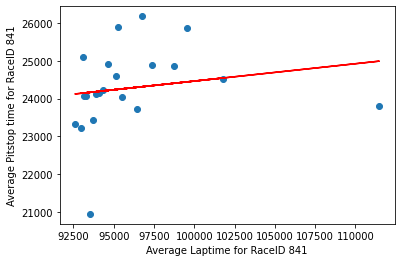

In [25]:
def get_rsq(y, yp):
    sse = np.sum((yp - y)**2)
    ybar = np.mean(y)
    sst = np.sum((y - ybar)**2)
    ssr = np.sum((yp - ybar)**2)
    #ssr = sst - sse
    return ssr/sst
y_=coeff[0]*x+coeff[1]
plt.plot(x,y_,'r')
plt.scatter(x,y);
plt.xlabel('Average Laptime for RaceID 841');
plt.ylabel('Average Pitstop time for RaceID 841');
print(f"Rsq of the fit is {get_rsq(y,y_)}")

In [26]:
#Plotting linear fit for all the data

Rsq of the fit is 0.05663766973276212


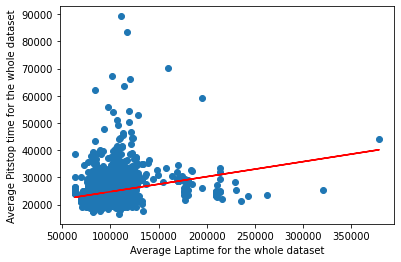

In [27]:
x=data['avg laptime']
y=data['Avg Pit Time']
coeff=np.polyfit(x,y,1)
y_=coeff[0]*x+coeff[1]
rsq=get_rsq(y,y_)
plt.plot(x,y_,'r',label=r'Fit $(R^2 = %.3f)$' % rsq)
plt.scatter(x,y)
plt.xlabel('Average Laptime for the whole dataset');
plt.ylabel('Average Pitstop time for the whole dataset');
print(f"Rsq of the fit is {rsq}")

Clearly the linear regression fit suggests that the two random variables are not related, moreover we have seen that their 
correlation is close to 0. This suggests that the random variables are independent which will be proved in the hypothesis 
testing

In [ ]:
from scipy.stats import norm,chi2,t
from math import sqrt

#  Hypothesis Testing of Significance of Correlation Coefficient

The correlation coefficient,  $r$ , tells us about the strength and direction of the linear relationship between  random variables Pit time and Lapttime. However, the reliability of the linear model also depends on how many observed data points are in the sample. We need to look at both the value of the correlation coefficient  $r$  and the sample size  $n$ , together. We perform a hypothesis test of the "significance of the correlation coefficient" to decide whether the linear relationship in the sample data is strong enough to use to model the relationship in the population.

In [ ]:
datanew = data.drop(columns=['Unnamed: 0','position','Race ID','Driver ID']).sample(100,replace=False)

In [ ]:
datanew.corr(method= 'pearson')

In [ ]:
print('correlation coefficient :',datanew['Avg Pit Time'].corr(datanew['avg laptime']))

$ρ$=  population correlation coefficient (unknown) <br>
$r$= 0.1347    <i>sample correlation coefficient (known; calculated from sample data)</i>  <br>
$n$= 3926   <i>sample size </i>

<b>PERFORMING HYPOTHESIS</b>

<b>Null Hypothesis:         $H_0$:</b>   ρ=0     <br>
<b>Alternate Hypothesis:        $H_1$:</b>   ρ≠0 

<b> WHAT THE HYPTHESIS MEANS IN WORDS</b>  <br><br>
<b>Null Hypothesis: $H_0$:</b>  The population correlation coefficient IS NOT significantly different from zero. There IS NOT a significant linear relationship(correlation) between  Pit time  and Laptime in the population.     <br>
<b>Alternate Hypothesis:$H_1$:</b> The population correlation coefficient IS significantly DIFFERENT FROM zero. There IS A SIGNIFICANT LINEAR RELATIONSHIP (correlation) between  Pit time  and  Laptime  in the population. 



<b>USING p-VALUE TO MAKE DECISION with SIGNIFICANCE LEVEL 5%</b>

<b>If the  p-value  is less than the significance level ( α=0.05 ):</b><br>

Decision: Reject the null hypothesis.<br>
Conclusion:There is sufficient evidence to conclude that there is a significant linear relationship between Pit time and  Laptime  because the correlation coefficient is significantly different from zero.<br><br>

<b>If the  p-value  is NOT less than the significance level ( α=0.05 )</b><br>
Decision: WE FAIL TO REJECT the null hypothesis.<br>
Conclusion:There is INSUFFICIENT EVIDENCE to conclude that there is a significant linear relationship between Pit time  and  Laptime because the correlation coefficient is NOT significantly different from zero.

The  p-value  is calculated using a  t -distribution with  n−2  degrees of freedom.<br>
The formula for the test statistic is  $t=\frac{r\sqrt{n−2}}{\sqrt{1−r^2}} $

In [ ]:
n=int(datanew.count()[0] )   #sample size

alpha=0.01   #level of significance
r=datanew['Avg Pit Time'].corr(datanew['avg laptime'] )   # correlation ceofficient between Pit time and Laptime data
t_bar= (r*sqrt(n-2))/sqrt(1-(r**2))   #test statistic
p=2*(1-t(n-2).cdf(t_bar))
print('correlation coefficient :',r)
print('Value of test statistic is :',t_bar)
print('Corresponding p value is :',p)
if p<alpha:
    print('\nResult : p < α \nHence, we REJECT the null hypothesis')
else:
    print('\nResult : p > α \nHence, we FAIL TO REJECT the null hypothesis')   


Therefore,There is sufficient statistical evidence at the α=0.05 level to conclude that <b>there need not be significant linear relationship between Lap times and Pit times.<b>

This is in accordance with what is expected.